### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [146]:
from datetime import datetime
import pandas as pd
from multi_prophet import MultiProphet
from prophet import Prophet
df = pd.read_csv("joel_embiid_2020_2021.csv")

df_pre = df.iloc[:10,:]

df_pre = df_pre[df_pre.MP != 'Did Not Play']
df_pre = df_pre[df_pre.MP != 'Inactive']
df_pre = df_pre[df_pre.MP != 'Did Not Dress']

train = df_pre.values
print(train.shape)



(9, 30)


In [147]:
df_pre['Date'] = pd.to_datetime(df_pre['Date'], format='%Y-%m-%d')
print(df_pre.columns)
df_pre = df_pre.rename(columns = {'Date': 'ds', 'PTS': 'y'})
df_pre = df_pre[['ds', 'y']]
df_pre['cap'] = 30

Index(['Rk', 'G', 'Date', 'Age', 'Tm', 'Home', 'Opp', 'W/L', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-'],
      dtype='object')


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.



Initial log joint probability = -47.407
Iteration  1. Log joint probability =   -2.24638. Improved by 45.1607.
Iteration  2. Log joint probability =    6.68789. Improved by 8.93427.
Iteration  3. Log joint probability =    11.6915. Improved by 5.00359.
Iteration  4. Log joint probability =    13.8004. Improved by 2.1089.
Iteration  5. Log joint probability =    14.1415. Improved by 0.34116.
Iteration  6. Log joint probability =    14.1919. Improved by 0.0503709.
Iteration  7. Log joint probability =    14.1921. Improved by 0.000170103.
Iteration  8. Log joint probability =    14.2315. Improved by 0.0394702.
Iteration  9. Log joint probability =    14.3282. Improved by 0.096643.
Iteration 10. Log joint probability =    14.3336. Improved by 0.00544849.
Iteration 11. Log joint probability =    14.3409. Improved by 0.0072215.
Iteration 12. Log joint probability =    14.3412. Improved by 0.000300949.
Iteration 13. Log joint probability =    14.3429. Improved by 0.00178489.
Iteration 14. Lo

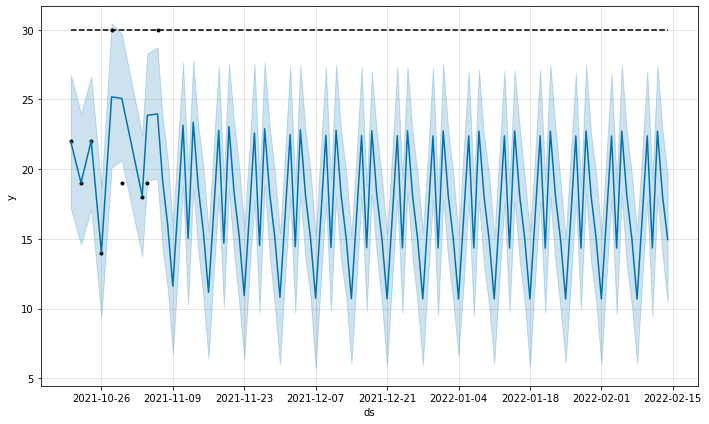

In [148]:
import warnings
warnings.filterwarnings('ignore')
ROS = Prophet(daily_seasonality=True, growth = 'logistic')
ROS.fit(df_pre)
pred_vals = ROS.make_future_dataframe(periods = 100)
pred_vals['cap'] = 30
results = ROS.predict(pred_vals)
results[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = ROS.plot(results)
